#  ::::::::::SpaceShip Titanic Transported Prediction w Deep learning:::::::::::::

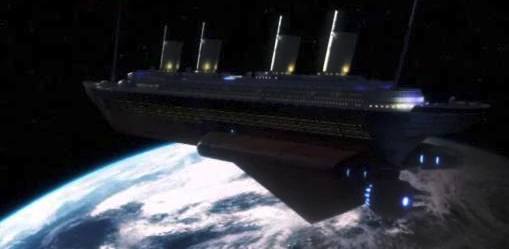

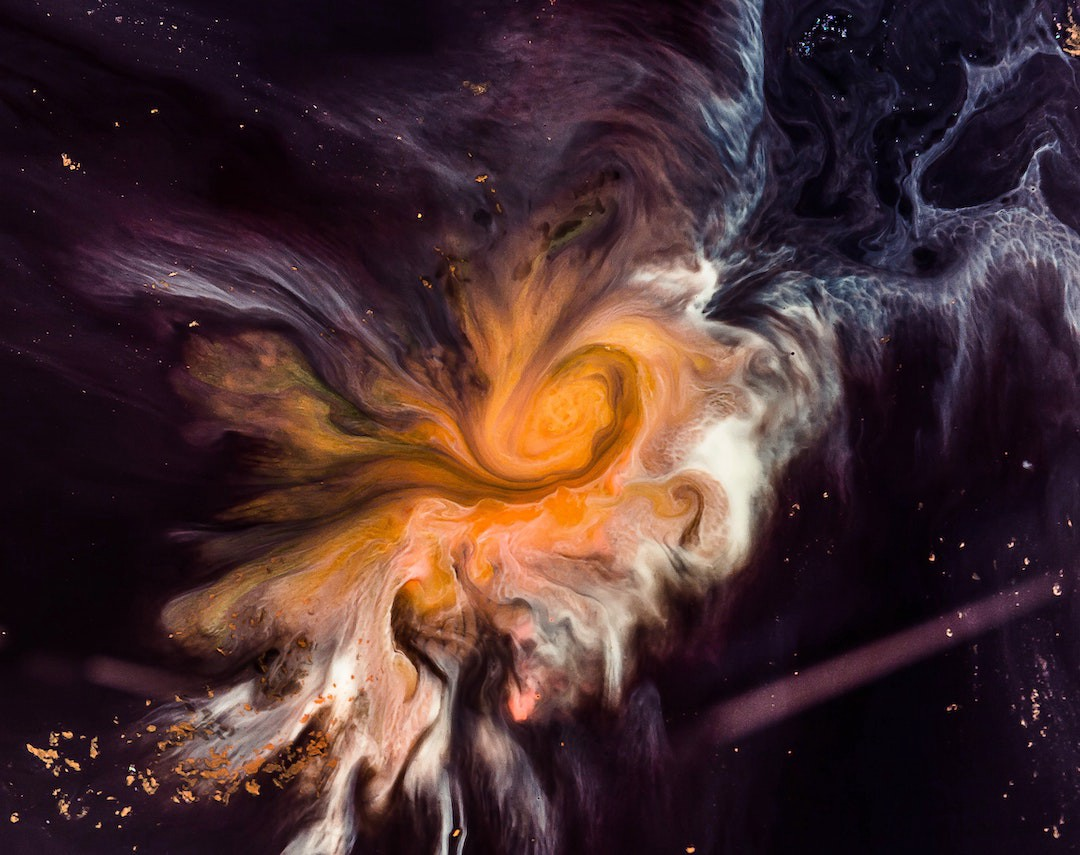

### We are going to predict who is going to transport, based on the spaceship dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\Kaggle projects\3-Spaceship Titanic

20.08.2022  18:39    <DIR>          .
20.08.2022  18:39    <DIR>          ..
20.08.2022  17:47    <DIR>          .ipynb_checkpoints
20.08.2022  17:47            59.902 sample_submission.csv
20.08.2022  17:47           372.487 test.csv
20.08.2022  17:47           805.421 train.csv
20.08.2022  18:39           194.901 Untitled.ipynb
               4 File(s)      1.432.711 bytes
               3 Dir(s)  55.394.439.168 bytes free


# file reading and merging

In [4]:
df1=pd.read_csv('train.csv')

In [5]:
df2=pd.read_csv('test.csv')

In [6]:
df=df1.append(df2)#Merges train.csv and test.csv as df

# Exploratory Data Analysis(EDA)

### Data understanding


In [7]:
df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
df.shape,df1.shape,df2.shape

((12970, 14), (8693, 14), (4277, 13))

In [9]:
df.sample(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8199,8769_01,Mars,False,F/1700/S,TRAPPIST-1e,44.0,False,1.0,0.0,2080.0,11.0,0.0,Chon Ches,True
5939,6302_04,Earth,True,NaN,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Debony Joycerton,True
1921,4119_01,Earth,False,F/776/S,TRAPPIST-1e,23.0,False,0.0,896.0,0.0,NaN,47.0,Elancy Cardners,NaN
4984,5320_01,Europa,True,E/330/P,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Errima Callower,True
5382,5750_01,Earth,False,E/363/P,TRAPPIST-1e,18.0,False,0.0,625.0,0.0,0.0,356.0,Herina Parklaney,False
952,1013_01,Earth,True,G/158/S,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Weslie Farleyatton,False
2965,3211_02,Earth,False,G/521/P,55 Cancri e,43.0,False,511.0,233.0,NaN,0.0,144.0,Maura Baldson,False
699,1441_01,Earth,False,F/284/P,TRAPPIST-1e,29.0,False,34.0,260.0,24.0,485.0,0.0,NaN,NaN
1545,1636_01,Earth,False,G/254/S,TRAPPIST-1e,41.0,False,139.0,666.0,6.0,71.0,25.0,Daisya Connelson,False
236,0253_01,Earth,False,G/42/P,TRAPPIST-1e,29.0,False,272.0,615.0,0.0,0.0,1.0,Dawne Cardner,False


In [10]:
df.info()#object data check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.067300,0.124447,0.034959,0.118992,0.101441
RoomService,0.067300,1.000000,-0.020146,0.057402,0.008936,-0.023847
FoodCourt,0.124447,-0.020146,1.000000,-0.001589,0.228990,0.244279
ShoppingMall,0.034959,0.057402,-0.001589,1.000000,0.010504,0.004485
Spa,0.118992,0.008936,0.228990,0.010504,1.000000,0.149874
VRDeck,0.101441,-0.023847,0.244279,0.004485,0.149874,1.000000


In [13]:
df['Name'].unique()

array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Jayrin Pore', 'Kitakan Conale', 'Lilace Leonzaley'], dtype=object)

In [14]:
df['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [15]:
df['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [16]:
df['Cabin'].value_counts()

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [17]:
df['Age'].value_counts()

18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: Age, Length: 80, dtype: int64

In [18]:
df['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [19]:
df['VRDeck'].value_counts()

0.0       8252
1.0        211
2.0        108
3.0         89
5.0         68
          ... 
395.0        1
3186.0       1
2519.0       1
1652.0       1
494.0        1
Name: VRDeck, Length: 1642, dtype: int64

In [20]:
df['Spa'].value_counts()

0.0       7935
1.0        218
2.0        148
3.0         82
4.0         73
          ... 
971.0        1
2290.0       1
1450.0       1
4517.0       1
1812.0       1
Name: Spa, Length: 1679, dtype: int64

In [21]:
df['ShoppingMall'].value_counts()

0.0       8331
1.0        225
2.0        112
3.0         94
4.0         69
          ... 
751.0        1
1573.0       1
1541.0       1
1661.0       1
3851.0       1
Name: ShoppingMall, Length: 1367, dtype: int64

In [22]:
df['FoodCourt'].value_counts()

0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, dtype: int64

In [23]:
df['FoodCourt'].value_counts()

0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, dtype: int64

In [24]:
df['RoomService'].value_counts()

0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64

In [25]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [26]:
df['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [27]:
df.isnull().sum()#null data check

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

# DATA VISUALIZATION

<AxesSubplot:title={'center':'Scatter KURT Plot'}, xlabel='Age', ylabel='VIP'>

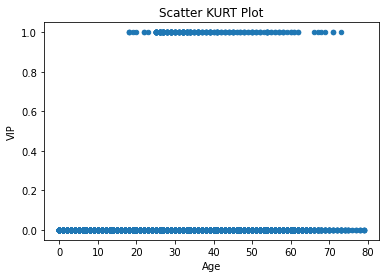

In [28]:
df.plot.scatter(x='Age',y='VIP',title='Scatter KURT Plot')


<AxesSubplot:title={'center':'Line Chart for Ahmet'}>

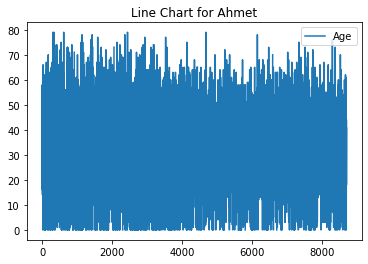

In [29]:
df[['Age','VIP']].plot.line(title='Line Chart for Ahmet')

<AxesSubplot:ylabel='Frequency'>

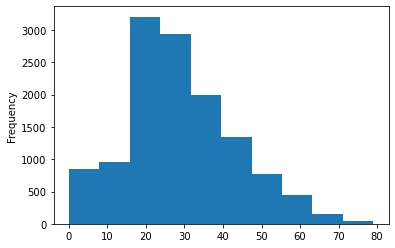

In [30]:
df['Age'].plot.hist()

<AxesSubplot:>

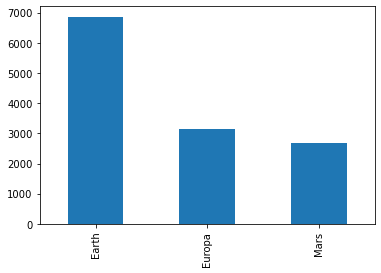

In [31]:
df['HomePlanet'].value_counts().sort_index().plot.bar()#shortindex sıraya dizilmesini sağlar

<AxesSubplot:>

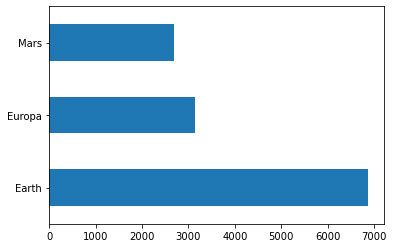

In [32]:
df['HomePlanet'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

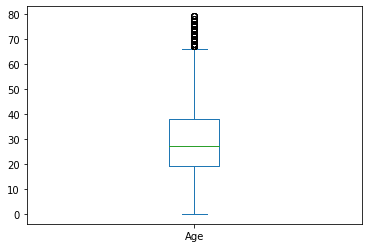

In [33]:
df['Age'].plot.box()

<AxesSubplot:xlabel='Age', ylabel='Density'>

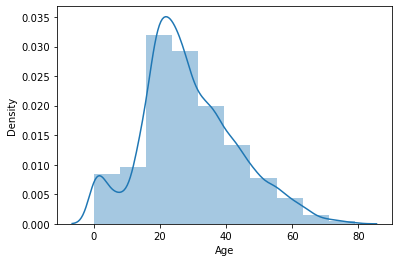

In [34]:
sns.distplot(df['Age'], bins=10,kde=True)#bins 10 tane sütun olusturdu

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

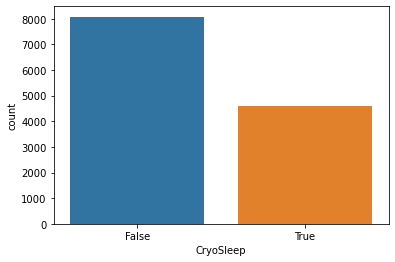

In [35]:
sns.countplot(df['CryoSleep'])

<AxesSubplot:>

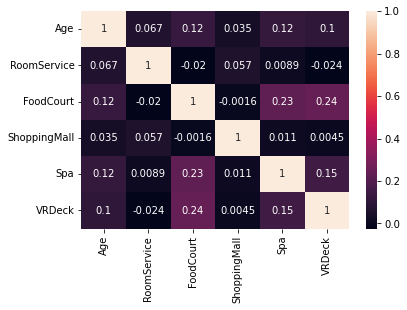

In [36]:
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

In [37]:
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
#these servieces seem laxury, better we put the expenditure on them as zero for null values

In [38]:
df['Age'] =df['Age'].fillna(df['Age'].median())#filling median of ages for missing ages so that we don't get much deviation


In [39]:
df['VIP']=df['VIP'].fillna(False)#assuming that if people were infact travelling with 'VIP' there would be a record of it

In [40]:
#from stastical information we can observe that the Earth is home planet for most passengers
df['HomePlanet'] =df['HomePlanet'].fillna('Earth')

In [41]:
#from statistical information the most frequent destination is TRAPPIST-1e
df['Destination']=df['Destination'].fillna("TRAPPIST-1e")

In [42]:
#Assuming that the null_valued passengers aren't kept in crayo sleep
df['CryoSleep'] =df['CryoSleep'].fillna(False)

In [43]:
#Filling the most used cabin
df['Cabin'] =df['Cabin'].fillna('G/734/S')

In [44]:
df['Transported']=df['Transported'].replace({True:1,False:0})

In [45]:
#Since there are no null values in passenger ID we can directly use it as default ID
#setting PassengerId as the Id
df.set_index('PassengerId',inplace=True)

In [ ]:
df['Transported']=df['Transported'].replace({True:1,False:0})
df['CryoSleep']=df['CryoSleep'].replace({True:1,False:0})
df['VIP']=df['VIP'].replace({True:1,False:0})


In [46]:
df.isnull().sum()

HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

In [47]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
9269_01,Earth,False,G/734/S,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
9271_01,Mars,True,D/296/P,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN


In [48]:
df.shape

(12970, 13)

# DEEP LEARNING

In [71]:
df=pd.get_dummies(df,drop_first=True)

In [74]:
x, y = df.drop("Transported",axis=1), df[["Transported"]]

In [75]:
x.shape, y.shape

((12970, 20), (12970, 1))

In [76]:
model = Sequential()
model.add(Dense(81,activation = "relu"))
model.add(Dense(40,activation = "relu"))
model.add(Dense(27,activation = "relu"))
model.add(Dense(19,activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(3,activation = "relu"))
model.add(Dense(1))

In [77]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [78]:
x=np.asarray(x).astype(np.int)

y=np.asarray(y).astype(np.int)

In [79]:
history=model.fit(x,y,epochs=80,batch_size=10,verbose=1)

Epoch 1/80
1297/1297 [==============================] - 9s 5ms/step - loss: -10225280000.0000 - accuracy: 0.3276
Epoch 2/80
1297/1297 [==============================] - 6s 4ms/step - loss: -10923278336.0000 - accuracy: 0.3327
Epoch 3/80
1297/1297 [==============================] - 6s 5ms/step - loss: -10923276288.0000 - accuracy: 0.3327
Epoch 4/80
1297/1297 [==============================] - 6s 4ms/step - loss: -10923280384.0000 - accuracy: 0.3327
Epoch 5/80
1297/1297 [==============================] - 6s 5ms/step - loss: -10923271168.0000 - accuracy: 0.3327
Epoch 6/80
1297/1297 [==============================] - 6s 4ms/step - loss: -10923276288.0000 - accuracy: 0.3327
Epoch 7/80
1297/1297 [==============================] - 6s 4ms/step - loss: -10923288576.0000 - accuracy: 0.3327
Epoch 8/80
1297/1297 [==============================] - 6s 5ms/step - loss: -10923278336.0000 - accuracy: 0.3327
Epoch 9/80
1297/1297 [==============================] - 6s 5ms/step - loss: -10923273216.0000 - 

1297/1297 [==============================] - 6s 4ms/step - loss: -10923288576.0000 - accuracy: 0.3327
Epoch 73/80
1297/1297 [==============================] - 6s 4ms/step - loss: -10923276288.0000 - accuracy: 0.3327
Epoch 74/80
1297/1297 [==============================] - 6s 5ms/step - loss: -10923280384.0000 - accuracy: 0.3327
Epoch 75/80
1297/1297 [==============================] - 6s 5ms/step - loss: -10923285504.0000 - accuracy: 0.3327
Epoch 76/80
1297/1297 [==============================] - 6s 5ms/step - loss: -10923278336.0000 - accuracy: 0.3327
Epoch 77/80
1297/1297 [==============================] - 6s 5ms/step - loss: -10923280384.0000 - accuracy: 0.3327
Epoch 78/80
1297/1297 [==============================] - 6s 4ms/step - loss: -10923283456.0000 - accuracy: 0.3327
Epoch 79/80
1297/1297 [==============================] - 5s 4ms/step - loss: -10923284480.0000 - accuracy: 0.3327
Epoch 80/80
1297/1297 [==============================] - 5s 4ms/step - loss: -10923268096.0000 - acc

In [80]:
scores=model.evaluate(x,y)

406/406 [==============================] - 2s 4ms/step - loss: -10923264000.0000 - accuracy: 0.3327


In [81]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 33.27%


In [82]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])
